## Classification Problems

**Dataset Used:** MNIST Dataset

* which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28,28)

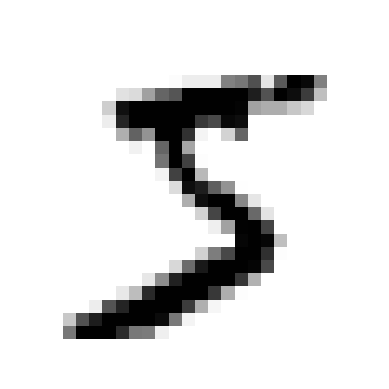

In [ ]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
y[0]

'5'

### Conducting a train_test split of the data

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Binary Classification

In binary classification, the target variable can take values of either 0 or 1. These are the only two classes for each observation or record.

### Gradient Descent

* Generic Optimization algorithm capable of finding optimal solutions to wide range of problems.
* General idea is to tweak parameters iteratively in order to minimize the cost function.
* It measures the local gradient of the error function with regards to the
parameter vector θ, and it goes in the direction of descending gradient.
* Concretely, you start by filling θ with random values (this is called random initialization), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.
* The cost function of linear regression model is convex function, so Gradient Descent can be used to find the optimal solution in linear problems without relying on the closed form equations for larger datasets.

  θ(next step) = θ − η∇θ MSE(θ)


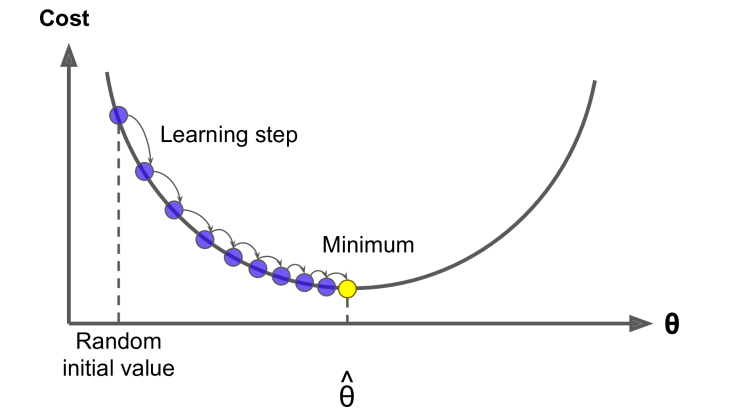

#### Stochastic Gradient Descent (SGD Classifier)

* It can handle large datasets efficiently as SGD deals with training instances independently. Also suited for online
* Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm).
* Stochastic Gradient Descent does not decrease gently until it reaches the minimum, it go up and down and only decreases on average. Therefore, over time it will be close to the minimum but the final parameters values are good and close to optimal but are not optimal.
* The SGD has better chance of finding global minima, bypassing local minima due to its irregularity introduced by using randomness, however, the algorithm never settles at the minimum.
* The solution to the above dillema is to gradually reduce the learning rate by starting out with large learning rate and overtime make it smaller so that algorithm can settle to global minimum.
* The function that determines the learning rate is called learning schedule and learning schedule should be setup carefully as reducing the learning rate too early can make the algorithm stuck in a local minimum. And on the other hand, reducing it too slowly can mean that algorithm will jump around the minimum for a long time.
* When using Stochastic Gradient Descent, the training instances must be independent and identically distributed (IID), to ensure that the parameters get pulled towards the global optimum, on average. A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not do this, for example if the instances are sorted by label, then SGD will start by
optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.

In [ ]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits.
y_test_5 = (y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Analysing classifier performance

**Cross-Validation Score**

the cross_val_score() function to evaluate your SGDClassifier model using K-fold cross-validation, with three folds. K-fold crossvalidation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the
remaining folds

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

#### Confusion Matrix, Precision, Recall, and PR Curve

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier.

precision = TP/(TP+FP)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

precision_score(y_train_5, y_train_pred)

0.8370879772350012

recall, also called sensitivity or true positive rate (TPR) this is the ratio of positive instances that are correctly detected by the classifier.

recall = TP/(TP+FN)

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall.

F1 = 2/(1/precision + 1/recall)

In [ ]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

increasing precision reduces recall, and vice versa. This is called the recision/recall tradeoff. To select appropriate precision and recall, one can plot precision and recall curves against the threshold or can directly plot precision and recall. The choice of threshold depends upon the different use cases.

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

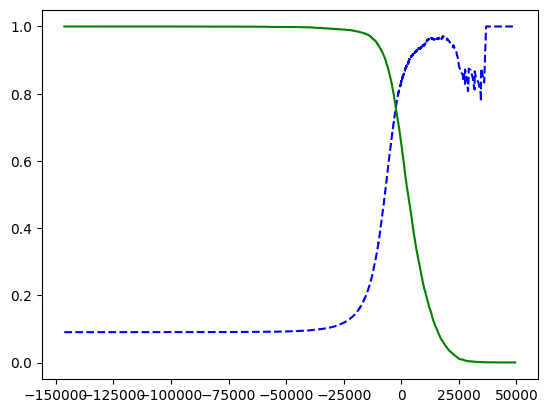

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

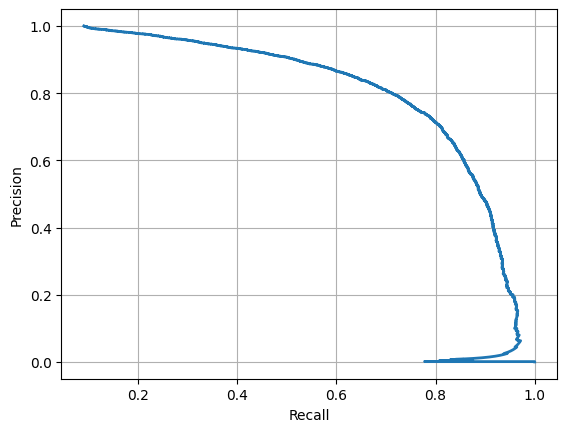

In [ ]:
def plot_pr_curve(precisions, recalls, label=None):
  plt.plot(precisions, recalls, linewidth=2, label=label)
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.grid(True)


plot_pr_curve(precisions, recalls, label=None)
plt.show()

**ROC (Receiver Operating Characterisitc) CURVE**

ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

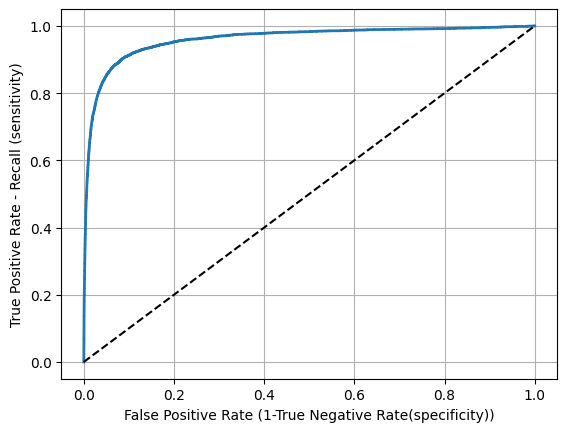

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.xlabel("False Positive Rate (1-True Negative Rate(specificity))")
  plt.ylabel("True Positive Rate - Recall (sensitivity)")
  plt.grid(True)


plot_roc_curve(fpr, tpr)
plt.show()


One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC

In [ ]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

**Important**
Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the topright corner).